In [2]:
import numpy as np
import cv2
from scipy import misc
i = misc.ascent()

<function matplotlib.pyplot.show(close=None, block=None)>

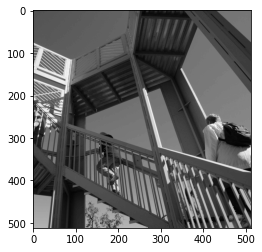

In [5]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('on')
plt.imshow(i)
plt.show

In [9]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [13]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them

weight  = 1

In [22]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x+1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight        
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255       
        i_transformed[x, y] = convolution

<function matplotlib.pyplot.show(close=None, block=None)>

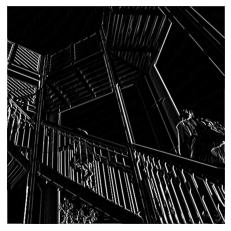

In [23]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i_transformed)
plt.show

In [24]:
'''
This code will show a (2, 2) pooling. 
The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath,
and right-beneath. Take the largest of them and load it into the new image. 
Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. 
You'll see that the features get maintained despite this compression
'''

"\nThis code will show a (2, 2) pooling. \nThe idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath,\nand right-beneath. Take the largest of them and load it into the new image. \nThus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. \nYou'll see that the features get maintained despite this compression\n"

In [27]:
new_x = int(size_x/2)
new_y = int(size_y/2)
new_img = np.zeros((new_x, new_y))

for x in range (0, size_x, 2):
    for y in range (0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        
        new_img[int(x/2), int(y/2)] = max(pixels)        

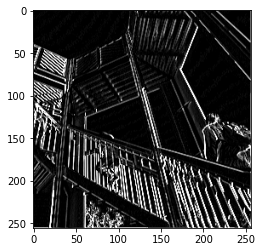

In [28]:
plt.gray()
plt.grid(False)
plt.imshow(new_img)
#plt.axis('off')
plt.show()